In [24]:
# 此代码只能在命令框shell中执行
#coding=utf-8
import pymysql 
import sys 
class TransferMoney: 
    def __init__(self,conn): 
        self.conn = conn 
    def check_acct_available(self, acctid): 
        try: 
            cursor = self.conn.cursor() 
            sql = "select * from account where acctid= %s " % acctid 
            cursor.execute(sql) 
            print ("check_acct_available:" + sql) 
            rs = cursor.fetchall() 
            if len(rs) != 1: 
                raise Exception("账号%s 不存在(Inexistence)" % acctid) 
        finally:
            cursor.close() 
                
    def has_enough_money(self, acctid, money): 
        try: 
            cursor = self.conn.cursor() 
            sql = "select * from account where acctid=%s and money>=%s" % (acctid,money) 
            cursor.execute(sql) 
            print ("has_enough_money:" + sql) 
            rs = cursor.fetchall() 
            if len(rs) != 1: 
                raise Exception("账号%s余额不足" % acctid) 
        finally: 
            cursor.close() 
    def reduce_money(self, acctid, money): 
        try: 
            cursor = self.conn.cursor() 
            sql = "update account set money= money-%s WHERE acctid=%s " % (money,acctid) 
            cursor.execute(sql) 
            print ("reduce_money:" + sql) 
            rs = cursor.rowcount 
            if rs != 1: 
                raise Exception("账号%s付款失败" % acctid) 
        finally: 
            cursor.close() 
    def add_money(self, acctid, money): 
        try: 
            cursor = self.conn.cursor() 
            sql = "update account set money= money+%s WHERE acctid=%s " % (money,acctid) 
            cursor.execute(sql) 
            print("add_money:" + sql) 
            rs = cursor.rowcount 
            if rs != 1: 
                raise Exception("账号%s收款失败" % acctid) 
        finally: 
            cursor.close() 
    def transfer(self, source_acctid, target_acctid, money): 
        try: 
            self.check_acct_available(source_acctid) 
            self.check_acct_available(target_acctid) 
            self.has_enough_money(source_acctid,money) 
            self.reduce_money(source_acctid,money) 
            self.add_money(target_acctid,money) 
            self.conn.commit() 
        except Exception as e: 
            self.conn.rollback() 
            raise e 
if __name__=="__main__": 
    ## print("sys.argv[1:]:",sys.argv[1:])
    source_acctid = sys.argv[1] 
    target_acctid = sys.argv[2] 
    money = sys.argv[3] 
    conn = pymysql.connect( 
        host = '127.0.0.1', 
        port = 3306, 
        user = 'root', 
        passwd = '123456', 
        db = 'imooc', 
        charset = 'utf8' ) 
    tr_money = TransferMoney(conn) 
    try: 
        tr_money.transfer(source_acctid,target_acctid,money) 
    except Exception as e: 
        print("出现问题：" + str(e)) 
    finally: 
        conn.close()



IndexError: list index out of range

### 这个需要从命令行执行，需要带参数。
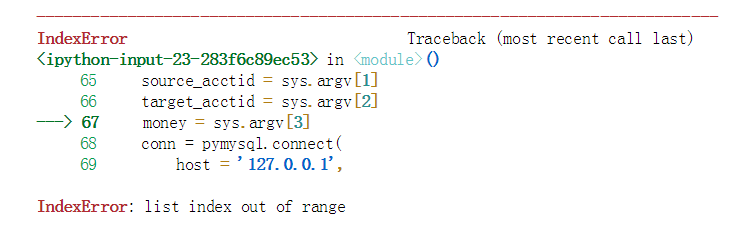

python *.py 参数1

* 解决办法
这个需要从命令行执行，需要带参数。
python *.py 参数1